Source: 
https://irweb.irepertoire.com/nir/

Username: demo

Password: 12345

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/yhc/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/21013_0_CDR3Length.csv",sep='\t',index_col=0,names="X")
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/25671_CDRs.csv",usecols=["Freq"])
#data=pd.read_csv("~/Downloads/Demo_Data-Demo/21551_CDR3_list_1.csv",header=None)
data=pd.read_csv("~/Downloads/Demo_Data-Demo/21747_CDR3_list_1.csv",header=None)
data.columns=["CDR3",'Freq']
data

,CDR3,Freq
0,AKTTYYYDSSGYQTPYYFDY,7537
1,ARSAAVVATAFTWRSYKGMDV,1804
2,ARHGQQLALA,1722
3,ARILKDSSGWYHFDY,1297
4,ARGAYSSNYARIDD,1250
5,ATDQPGFGFEV,1203
6,AKAQNVQYHAFDI,1098
7,VRVVPNNYGYGY,978
8,ARGRGYRESYYAFDI,911
9,ARRVLPQKNHFDS,859


In [3]:
n=len(data) # data.shape[0]
if n>10000:
    data=data.loc[0:10000-1]
    n=len(data)
    
r=data.Freq
totalReads=sum(r)

### Calculate entropy

In [4]:
p=r/sum(r)
-sum(p*np.log2(p))

12.953384593183358

### Calculate Diversity Index
Find where 50% of total reads falls into the cumulative series

In [5]:
totalReads50=round(totalReads/2)
totalReads50

367766

In [6]:
y = np.zeros(n+1,dtype=np.int32)
y[1]=r[0]
for i in range(2,n+1):
    y[i]=y[i-1]+r[i-1]
    if y[i-1]<totalReads50:
        if y[i]>totalReads50:
            print("found 50%! i=",i)
            DI=i*100/n
            print("DI={:.1f}".format(DI) )

found 50%! i= 2818
DI=28.2


In [7]:
k=np.arange(n+1)
k

array([    0,     1,     2, ...,  9998,  9999, 10000])

In [8]:
x=k/n
x

array([0.000e+00, 1.000e-04, 2.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

In [9]:
y0 = np.zeros(n+1)
y0=k/n*sum(r)
y0

array([0.00000000e+00, 7.35533000e+01, 1.47106600e+02, ...,
       7.35385893e+05, 7.35459447e+05, 7.35533000e+05])

Text(0.5,1,'D.I.=28.2')

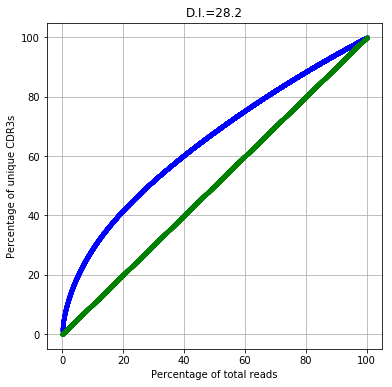

In [10]:
plt.figure(figsize=(6,6))
plt.plot(x*100,y/max(y)*100,'b.-')
plt.plot(x*100,y0/max(y0)*100,'g.--')
plt.grid(True)
plt.rc('grid', linestyle="--", color='black')
plt.xlabel("Percentage of total reads")
plt.ylabel("Percentage of unique CDR3s")
plt.title('D.I.={:.1f}'.format(DI))